In [ ]:
# How to design a Montecarlo simulation from a capital curb of an investment system


In [ ]:
# my colection o results

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
from datetime import date
import random
import collections
import matplotlib.pyplot as plt
import matplotlib

In [2]:
## step 1
df=pd.read_csv('../Data/ES_04.csv', parse_dates=['date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821 entries, 0 to 2820
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2821 non-null   datetime64[ns]
 1   timetable         2821 non-null   object        
 2   max               2821 non-null   float64       
 3   min               2821 non-null   float64       
 4   range             2821 non-null   float64       
 5   range-trail       2821 non-null   float64       
 6   range-avg         2821 non-null   float64       
 7   open              2821 non-null   float64       
 8   long-close        2821 non-null   float64       
 9   short-close       2821 non-null   float64       
 10  close             2821 non-null   float64       
 11  long-rst          2821 non-null   float64       
 12  short-rst         2821 non-null   float64       
 13  longe-acc         2821 non-null   float64       
 14  shorte_acc        2821 n

[  0. 953. 731.  40.   4.   0.   0.   0.] [-0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25  0.3 ] <a list of 8 Patch objects>


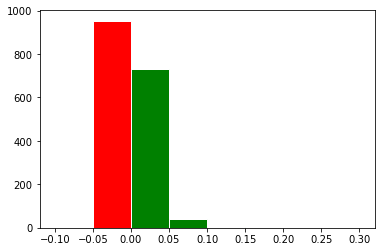

In [5]:
fig, ax = plt.subplots()
data = (df[df['result-amt']!=0]['result-amt'].cumsum()+24000).pct_change().tolist()

num, bins, patches = ax.hist(data, edgecolor='white', linewidth=1, bins=[-0.10,-0.05,0.0,0.05,0.10,0.15,0.2,0.25,0.3])

for i in range(8):
    if (num[i] > 0) & (bins[i] >= 0) & (bins[i+1] >= 0):
        patches[i].set_facecolor('green')
    elif num[i] > 0:
        patches[i].set_facecolor('red')

print(num, bins, patches)

plt.show()


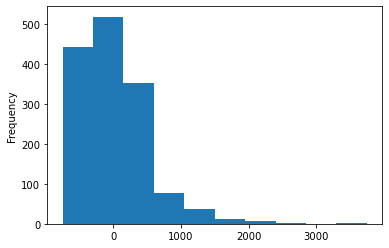

In [55]:
df[df['result-amt']!=0]['result-amt'].plot(kind='hist')

In [6]:
df[df['result-amt']!=0]['result-amt'].value_counts()

-537.5     29
-337.5     27
-362.5     26
-437.5     26
-487.5     25
           ..
 2337.5     1
 2312.5     1
 1037.5     1
 1125.0     1
 1812.5     1
Name: result-amt, Length: 198, dtype: int64

In [7]:
df[(df['result-amt']!=0) & (df['result-accum-amt']!=0)]['result-amt'].count()

1726

In [8]:
my_sumry=pd.DataFrame((df[df['result-amt']!=0]['result-amt'].cumsum()+24000).tolist(), index=df[df['result-amt']!=0]['date'], columns=['capital'])

In [69]:
my_sumry_res=my_sumry.resample('A').last()
my_sumry_res1=my_sumry.resample('A').last().pct_change()
print(my_sumry_res)
print(my_sumry_res1)
print(my_sumry.iloc[252])


            capital
date               
2014-12-31  25350.0
2015-12-31  24675.0
2016-12-31  29325.0
2017-12-31  26437.5
2018-12-31  26850.0
2019-12-31  46200.0
2020-12-31  50437.5
             capital
date                
2014-12-31       NaN
2015-12-31 -0.026627
2016-12-31  0.188450
2017-12-31 -0.098465
2018-12-31  0.015603
2019-12-31  0.720670
2020-12-31  0.091721
capital    25350.0
Name: 2014-12-31 00:00:00, dtype: float64


In [72]:
# table with monthly summary

df_sumry=pd.DataFrame((df[df['result-amt']!=0]['result-amt'].cumsum()+24000).tolist(), index=df[df['result-amt']!=0]['date'], columns=['capital'])
df_sumry_res=df_sumry.resample('M').last().pct_change()
len(df_sumry_res.index)

my_years=[]                                     # list with years
for i in df_sumry_res.index:
    my_year=i.year
    if my_year not in my_years:
        my_years.append(my_year)
        
df_sumry_tab=pd.DataFrame(0.0, columns=[1,2,3,4,5,6,7,8,9,10,11,12,'total'], index=my_years)
cont=0
for i in df_sumry_res.index:
    df_sumry_tab[i.month][i.year]=df_sumry_res['capital'][i]
    if cont==0:
        a=df_sumry.resample('M').last()
        df_sumry_tab[i.month][i.year]=(a['capital'].iloc[0]-24000)/24000
    cont=cont+1

#total_year_sum=0
#for i in df_sumry_tab.index: 
#    total_year_sum=0
#    for j in df_sumry_tab.columns:
#        if j!='total':
#            total_year_sum = total_year_sum + df_sumry_tab[j][i]
#   #         print(i,j,total_year_sum)
#    df_sumry_tab['total'][i]=total_year_sum


b=df_sumry.resample('A').last()
c=df_sumry.resample('A').last().pct_change()
for i in range(len(df_sumry_tab.index)):
    j=c.index.year[i]
    if i ==0:
        df_sumry_tab['total'][j]=(b.iloc[i]-24000)/24000
    else:
        df_sumry_tab['total'][j]=c.iloc[i]



df_sumry_tab

,1,2,3,4,5,6,7,8,9,10,11,12,total
2014,-0.034375,0.074434,0.027108,-0.050342,-0.050952,-0.013015,-0.064835,0.067568,0.011558,0.158868,-0.022535,-0.025937,0.056250
2015,-0.053254,0.051042,-0.042616,-0.095756,-0.064682,-0.070379,0.160632,0.054453,-0.052717,0.035207,0.054306,0.027055,-0.026627
2016,0.088146,0.085661,-0.049314,-0.065404,0.095560,-0.085022,-0.025999,0.101829,0.055630,-0.101572,0.041627,0.065395,0.188450
2017,-0.031543,-0.046215,0.153207,-0.039216,-0.066639,0.030344,-0.011693,-0.010955,0.016837,0.006536,-0.063636,-0.022191,-0.098465
2018,-0.042080,-0.126357,0.007345,-0.005609,0.103779,-0.013797,0.052850,-0.035433,-0.082653,0.011680,-0.064871,0.262787,0.015603
2019,0.012104,-0.165133,-0.003306,0.035931,0.101921,0.072155,0.022132,0.307998,-0.015203,0.247684,-0.029420,0.047025,0.720670
2020,0.055195,0.038205,-0.016300,0.063771,-0.017937,-0.060562,0.041443,-0.113240,0.091136,0.024372,0.000000,0.000000,0.091721


In [36]:
my_sumry.resample('A').last().pct_change()['capital'][0]

nan

In [56]:
a=df_sumry.resample('M').last()
a['capital'].iloc[0]

23037.5

In [ ]:
df_sumry_res.index[]

In [13]:
df_rand['value']=df[df['result-amt']!=0]['result-amt']

In [7]:
# percentage of losers and winnwrs
"{0:.0%}".format(1./3)
 "{0:.0%}".format(df[df['result-amt']<0]['result-amt'].count()/df[df['result-amt']!=0]['result-amt'].count())

'53%'

In [19]:
df_rand['value']=df[df['result-amt']!=0]['result-amt'].tolist()
df_rand['value']

0      -512.5
1      -187.5
2      -187.5
3      -312.5
4      -400.0
        ...  
1186     62.5
1187   -437.5
1188    -62.5
1189   -300.0
1190    -75.0
Name: value, Length: 1191, dtype: float64

In [85]:
# step 2 monte carlo simulation
mc=np.random.choice(df[df['result-amt']!=0]['result-amt'],size=(df[df['result-amt']!=0]['result-amt'].count(),1000), replace=True)
df_mc=pd.DataFrame(mc)
df_mc['original']=df[df['result-amt']!=0]['result-amt'].tolist()

In [86]:
df_mc

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,original
0,-300.0,-75.0,-425.0,337.5,-162.5,450.0,-450.0,-525.0,125.0,-187.5,...,-112.5,2050.0,-12.5,-112.5,150.0,462.5,-175.0,-450.0,-462.5,37.5
1,-62.5,-662.5,-100.0,200.0,-537.5,75.0,612.5,25.0,-475.0,900.0,...,-362.5,575.0,550.0,62.5,137.5,487.5,375.0,-425.0,175.0,-187.5
2,-300.0,-75.0,87.5,12.5,-500.0,162.5,-87.5,-400.0,-287.5,425.0,...,-162.5,-700.0,-350.0,-12.5,25.0,12.5,787.5,137.5,887.5,375.0
3,-362.5,-225.0,575.0,-687.5,250.0,-537.5,-87.5,-325.0,75.0,1512.5,...,162.5,-625.0,-112.5,-87.5,350.0,-312.5,-550.0,62.5,-525.0,-50.0
4,87.5,-475.0,287.5,1162.5,850.0,-225.0,-262.5,450.0,-487.5,-200.0,...,12.5,-650.0,387.5,-250.0,-25.0,-325.0,-550.0,-587.5,-500.0,-250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,100.0,-12.5,125.0,-50.0,-525.0,75.0,-337.5,300.0,287.5,-725.0,...,287.5,-75.0,587.5,1237.5,-675.0,200.0,-562.5,1250.0,150.0,275.0
1442,37.5,225.0,312.5,-437.5,-325.0,-337.5,-437.5,-537.5,300.0,425.0,...,212.5,-587.5,-500.0,637.5,1837.5,1225.0,-325.0,87.5,1162.5,12.5
1443,375.0,-450.0,-262.5,587.5,-37.5,662.5,-387.5,75.0,-187.5,-400.0,...,-50.0,-200.0,287.5,1362.5,-362.5,900.0,-512.5,125.0,-600.0,-487.5
1444,-662.5,-662.5,1762.5,1162.5,162.5,-312.5,200.0,-525.0,725.0,412.5,...,-75.0,-25.0,-212.5,112.5,137.5,12.5,12.5,-575.0,50.0,62.5


In [88]:
np.min(df_mc[0].sum()+24000)

22150.0

In [46]:
m_idx=pd.to_datetime(df[df['result-amt']!=0]['date'])
my_dff=pd.DataFrame(df_mc.iloc[:, 0:1001].to_numpy())
my_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Columns: 1001 entries, 0 to 1000
dtypes: float64(1001)
memory usage: 9.1 MB


In [47]:
my_dff

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,25.0,-262.5,-225.0,25.0,-300.0,-237.5,437.5,-512.5,-700.0,-475.0,...,-87.5,162.5,1250.0,925.0,-575.0,-137.5,-75.0,-37.5,-275.0,-512.5
1,-87.5,387.5,75.0,62.5,-62.5,962.5,337.5,-400.0,-562.5,1425.0,...,125.0,462.5,-450.0,-375.0,-562.5,-250.0,112.5,150.0,-87.5,-187.5
2,175.0,112.5,-37.5,-25.0,-412.5,1050.0,-350.0,-337.5,87.5,-162.5,...,175.0,-125.0,-312.5,-212.5,62.5,1187.5,150.0,-262.5,412.5,-187.5
3,962.5,-412.5,-575.0,-312.5,-237.5,425.0,-225.0,-262.5,-200.0,-437.5,...,-487.5,-75.0,237.5,-562.5,-137.5,-300.0,-500.0,325.0,-225.0,-312.5
4,262.5,-475.0,-600.0,962.5,587.5,-112.5,-475.0,-537.5,75.0,-262.5,...,-62.5,-225.0,-212.5,-462.5,-225.0,225.0,1812.5,150.0,-375.0,-400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,-225.0,-262.5,-387.5,337.5,-150.0,287.5,50.0,-162.5,-275.0,-75.0,...,825.0,-225.0,50.0,-125.0,487.5,-75.0,75.0,50.0,-425.0,62.5
1187,1200.0,250.0,250.0,387.5,-350.0,412.5,-387.5,-125.0,1425.0,-75.0,...,1937.5,-237.5,37.5,-262.5,112.5,-225.0,537.5,-550.0,-250.0,-437.5
1188,362.5,325.0,-12.5,-312.5,-325.0,-162.5,375.0,400.0,-112.5,-575.0,...,-62.5,-425.0,-700.0,150.0,-550.0,-75.0,437.5,-312.5,412.5,-62.5
1189,537.5,-550.0,-400.0,-237.5,-437.5,187.5,-325.0,50.0,-425.0,350.0,...,-275.0,-312.5,87.5,-262.5,-600.0,-237.5,-400.0,-400.0,-187.5,-300.0


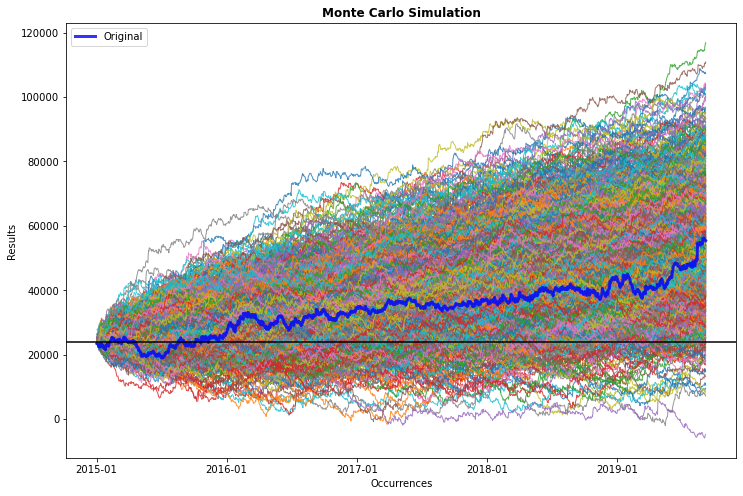

In [48]:
# plot all montecarlo simulations
import matplotlib.dates as mdates
m_idx=pd.to_datetime(df[df['result-amt']!=0]['date'])
my_plot_0=pd.DataFrame(df_mc.iloc[:, 0:1001].to_numpy(), index=m_idx)

#my_plot_0=df_mc
#my_plot_0.set_index(df[df['result-amt']!=0]['date'],inplace=True)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(my_plot_0.cumsum()+24000, lw=1, alpha=.8)
ax.plot(my_plot_0[1000].cumsum()+24000, lw=3, color="b", alpha=.8, label="Original")
ax.axhline(24000, color="black")
ax.legend()
ax.set_title('Monte Carlo Simulation', fontweight="bold")
plt.ylabel("Results")
plt.xlabel("Occurrences")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()
plt.close()

In [51]:
my_plot_0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1191 entries, 2015-01-02 to 2019-09-06
Columns: 1001 entries, 0 to 1000
dtypes: float64(1001)
memory usage: 9.1 MB


In [111]:
print(datetime.datetime.now(),'->', 100)

2020-10-15 18:32:38.519937 -> 100


In [8]:
df_mc.describe()


,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,original
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,37.772880,39.210747,59.571788,24.443745,37.038203,20.633921,34.823678,30.510076,21.609992,0.734677,...,29.397565,30.153233,24.086902,30.184719,28.988245,25.955080,10.631822,35.652813,9.277918,26.353904
std,505.651806,531.762258,536.647952,521.411888,511.758838,517.347780,534.958375,501.201495,528.280741,473.626925,...,525.854096,513.140175,515.488143,529.486519,496.382496,510.783409,468.304956,524.902951,482.143850,507.308330
min,-700.000000,-700.000000,-700.000000,-700.000000,-687.500000,-700.000000,-700.000000,-700.000000,-700.000000,-700.000000,...,-700.000000,-700.000000,-700.000000,-700.000000,-700.000000,-700.000000,-700.000000,-700.000000,-700.000000,-700.000000
25%,-325.000000,-356.250000,-350.000000,-375.000000,-343.750000,-375.000000,-375.000000,-362.500000,-362.500000,-362.500000,...,-375.000000,-350.000000,-375.000000,-362.500000,-350.000000,-368.750000,-350.000000,-350.000000,-368.750000,-362.500000
50%,-37.500000,-75.000000,-12.500000,-37.500000,-50.000000,-62.500000,-50.000000,-50.000000,-75.000000,-87.500000,...,-62.500000,-50.000000,-62.500000,-50.000000,-50.000000,-50.000000,-62.500000,-62.500000,-62.500000,-50.000000
75%,250.000000,312.500000,337.500000,287.500000,287.500000,262.500000,287.500000,293.750000,268.750000,262.500000,...,287.500000,275.000000,300.000000,287.500000,287.500000,262.500000,287.500000,275.000000,262.500000,275.000000
max,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,2325.000000,3750.000000,2325.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,2450.000000,3750.000000,2450.000000,3750.000000,2450.000000,3750.000000


In [162]:
# net profit (random)
df_mc[999].sum()

12162.5

In [135]:
# net profit
df[df['result-amt']!=0]['result-amt'].sum()

31387.5

In [26]:

feature_list=['netprofit','netprofit_prc','annual_netprofit_prc','MDD','MDD_prc','exposure','ANP-MDD','sharpe', 'recoveryfactor', 
                              'profitfactor','winners_prc','avg_profit','losers_prc','avg_lost','lowest_cap']
df_stat = pd.DataFrame(0, index=np.arange(1001), columns=feature_list)
df_stat

,netprofit,netprofit_prc,annual_netprofit_prc,MDD,MDD_prc,exposure,ANP-MDD,sharpe,recoveryfactor,profitfactor,winners_prc,avg_profit,losers_prc,avg_lost
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# step 3 statistics of montecarlo

pd.options.mode.chained_assignment = None                     # default='warn' This is to avoid warnings of chained-assignment
guarantee=24000                # dos veces la garantia del broker (5-10% del valor subyacente)
time=4.5                     # tiempo en años

feature_list=['random','netprofit','netprofit_prc','annual_netprofit_prc','MDD','MDD_prc','exposure','ANP-MDD','sharpe', 'recoveryfactor', 
                              'profitfactor','winners_prc','avg_profit','losers_prc','avg_lost','lowest_cap']
df_stat = pd.DataFrame(0.0, index=np.arange(1001), columns=feature_list)

for w in range(1001):
    jaj=w
    if w==1000:
        jaj='original'
    df_stat['random'][w]=jaj
    df_stat['netprofit'][w]=df_mc[jaj].sum()
    df_stat['netprofit_prc'][w]=(df_mc[jaj].sum()+guarantee)/guarantee
    if df_stat['netprofit_prc'][w]>0:
        df_stat['annual_netprofit_prc'][w] = ((df_mc[jaj].sum()+guarantee)/guarantee)**(1/time) - 1
    else:
        df_stat['annual_netprofit_prc'][w] = 0.0
    df_stat['MDD'][w], df_stat['MDD_prc'][w] = max_dd(guarantee, df_mc[jaj])
    df_stat['exposure'][w]=38/88
    if df_stat['netprofit_prc'][w]>0:
        df_stat['ANP-MDD'][w]=df_stat['annual_netprofit_prc'][w]/df_stat['MDD'][w]
    else:
        df_stat['ANP-MDD'][w]=0.0
    df_stat['sharpe'][w]=df_mc[jaj].cumsum().diff().mean()/df_mc[jaj].cumsum().diff().std() * np.sqrt(252)
    df_stat['recoveryfactor'][w]=df_stat['netprofit'][w]/df_stat['MDD'][w]
    df_stat['profitfactor'][w]=(0-1)*np.nansum(np.where(df_mc[jaj]>=0,df_mc[jaj],np.nan))/np.nansum(np.where(df_mc[jaj]<0,df_mc[jaj],np.nan))
    df_stat['winners_prc'][w]=df_mc[df_mc[jaj]>=0][jaj].count()/df_mc[jaj].count()
    df_stat['avg_profit'][w]=np.nanmean(np.where(df_mc[jaj]>=0,df_mc[jaj],np.nan))
    df_stat['losers_prc'][w]=df_mc[df_mc[jaj]<0][jaj].count()/df_mc[jaj].count()
    df_stat['avg_lost'][w]=np.nanmean(np.where(df_mc[jaj]<0,df_mc[jaj],np.nan))
    df_stat['lowest_cap'][w]=np.min(df_mc[jaj].sum()+guarantee)

df_stat

,random,netprofit,netprofit_prc,annual_netprofit_prc,MDD,MDD_prc,exposure,ANP-MDD,sharpe,recoveryfactor,profitfactor,winners_prc,avg_profit,losers_prc,avg_lost
0,0,47562.5,2.981771,0.274790,7325.0,0.197697,0.431818,0.000038,1.215431,6.493174,1.226300,0.471033,459.425134,0.528967,-333.611111
1,1,24800.0,2.033333,0.170822,14612.5,0.487083,0.431818,0.000012,0.668117,1.697177,1.117230,0.460957,430.510018,0.539043,-329.517134
2,2,29075.0,2.211458,0.192876,16725.0,0.311598,0.431818,0.000012,0.768800,1.738416,1.131994,0.456759,458.363971,0.543241,-340.455951
3,3,39300.0,2.637500,0.240504,7612.5,0.250000,0.431818,0.000032,0.980626,5.162562,1.185072,0.464316,455.063291,0.535684,-332.836991
4,4,21875.0,1.911458,0.154850,21700.0,0.321125,0.431818,0.000007,0.589944,1.008065,1.101267,0.458438,435.691392,0.541562,-334.903101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,37262.5,2.552604,0.231518,11200.0,0.446437,0.431818,0.000021,0.929118,3.327009,1.175964,0.460957,453.597450,0.539043,-329.848131
997,997,15300.0,1.637500,0.115824,23325.0,0.525338,0.431818,0.000005,0.425894,0.655949,1.070183,0.465155,421.119134,0.534845,-342.229199
998,998,9225.0,1.384375,0.074954,12537.5,0.473560,0.431818,0.000006,0.260964,0.735793,1.042261,0.456759,418.221507,0.543241,-337.384080
999,999,35537.5,2.480729,0.223726,16737.5,0.265096,0.431818,0.000013,0.894142,2.123226,1.157612,0.458438,478.044872,0.541562,-349.573643


In [13]:
df_stat.isnull().sum()

random                  0
netprofit               0
netprofit_prc           0
annual_netprofit_prc    0
MDD                     0
MDD_prc                 0
exposure                0
ANP-MDD                 0
sharpe                  0
recoveryfactor          0
profitfactor            0
winners_prc             0
avg_profit              0
losers_prc              0
avg_lost                0
dtype: int64

In [190]:
df_stat.describe()

,netprofit,netprofit_prc,annual_netprofit_prc,MDD,MDD_prc,exposure,ANP-MDD,sharpe,recoveryfactor,profitfactor,winners_prc,avg_profit,losers_prc,avg_lost
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,32623.201798,2.359300,0.198656,40952.947053,0.662561,4.318182e-01,0.000005,0.848717,0.745186,1.155375,0.468931,440.263788,0.531069,-337.181888
std,17825.001136,0.742708,0.092823,14434.199711,0.096425,1.110778e-16,0.000002,0.452728,0.274098,0.087999,0.014677,18.677295,0.014677,7.116887
min,-25200.000000,-0.050000,-0.261089,13000.000000,0.384146,4.318182e-01,-0.000011,-0.718452,-0.839650,0.888999,0.423174,371.001838,0.482788,-357.132018
25%,20375.000000,1.848958,0.146350,29750.000000,0.604960,4.318182e-01,0.000005,0.544777,0.685225,1.093390,0.458438,427.619485,0.522250,-342.177419
50%,32700.000000,2.362500,0.210519,39775.000000,0.671246,4.318182e-01,0.000005,0.864734,0.833333,1.153046,0.469353,439.874552,0.530647,-337.200000
75%,44362.500000,2.848438,0.261896,50337.500000,0.719111,4.318182e-01,0.000005,1.150248,0.915706,1.211273,0.477750,452.760870,0.541562,-332.317547
max,85775.000000,4.573958,0.401947,87162.500000,1.430832,4.318182e-01,0.000007,2.156510,1.032727,1.427432,0.517212,502.396953,0.576826,-314.933281


In [40]:
# step 4 Quartiles dataframe
feature_list=['random','netprofit','netprofit_prc','annual_netprofit_prc','MDD','MDD_prc','exposure','ANP-MDD','sharpe', 
              'recoveryfactor','profitfactor','winners_prc','avg_profit','losers_prc','avg_lost']
df_quart=pd.DataFrame(0.0, columns=range(15),index=range(101))
for k in range(1,15):
    df_quart[k]=np.percentile(df_stat[df_stat.columns[k]].tolist(), range(101))
df_quart.columns=feature_list
df_quart

,random,netprofit,netprofit_prc,annual_netprofit_prc,MDD,MDD_prc,exposure,ANP-MDD,sharpe,recoveryfactor,profitfactor,winners_prc,avg_profit,losers_prc,avg_lost
0,0.0,-27362.5,-0.140104,-0.371210,4937.5,0.103183,0.431818,-1.257806e-05,-0.789290,-0.727210,0.883322,0.422334,382.158688,0.482788,-360.486322
1,0.0,-10737.5,0.552604,-0.108865,6075.0,0.122403,0.431818,-5.413002e-06,-0.297919,-0.463496,0.951682,0.433249,398.623646,0.499580,-354.818548
2,0.0,-6637.5,0.723437,-0.054927,6387.5,0.127802,0.431818,-3.506652e-06,-0.173541,-0.336158,0.970941,0.438287,403.297683,0.502939,-353.120032
3,0.0,-2700.0,0.887500,-0.019150,6625.0,0.139605,0.431818,-1.271771e-06,-0.067038,-0.140717,0.987891,0.439966,405.343691,0.504618,-351.433121
4,0.0,912.5,1.038021,0.008327,6775.0,0.145237,0.431818,2.586995e-07,0.022746,0.028350,1.003915,0.442485,407.660590,0.505458,-350.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,60875.0,3.536458,0.324049,22012.5,0.640544,0.431818,4.268120e-05,1.551142,7.812133,1.298006,0.494542,471.389892,0.557515,-326.603053
97,0.0,63475.0,3.644792,0.332957,23087.5,0.713300,0.431818,4.445059e-05,1.608019,8.206704,1.310473,0.495382,474.438959,0.560034,-325.748031
98,0.0,65825.0,3.742708,0.340833,24350.0,0.740115,0.431818,4.697166e-05,1.672615,8.839486,1.323380,0.497061,476.814516,0.561713,-324.437112
99,0.0,68950.0,3.872917,0.351062,26487.5,0.861546,0.431818,5.349317e-05,1.779269,10.073434,1.344613,0.500420,480.116822,0.566751,-322.798742


In [ ]:
# stats to plot

# ratios ####
# net profit (precentage, acumm, final, annual percentage)
# capital (initial, final, minimum, maximum)
# maximum drawdown (amount, percentage)
# sharpe (0.5 - 2)
# recovery-factor ( 2 - 6)
# profit-factor ( 2 - 6)

# plots ####
# capital evolution
# table of monthly profit/lost  ????
# drawdown evolution
# Montecarlo Simulation
#      min/max capital evolution
#      final capital / percentils
#      annual profit percentage / percentils
#      max drawdown percentage / percentils


In [41]:
# PROFIT & CAPITAL
guarantee=24000
time=4.5

init_capital=guarantee
print(f'Initial capital = {init_capital}')
final_cum_cap=df_mc['original'].sum()+guarantee
print(f'Final cumulated capital = {final_cum_cap}')
final_net_cap=df_mc['original'].sum()
print(f'Final net capital = {final_net_cap}')
min_capital=df_mc['original'].cumsum().min() + guarantee
print(f'Minimum capital = {min_capital}')
max_capital=df_mc['original'].cumsum().max() + guarantee
print(f'Maximum capital = {max_capital}')

net_profit_prc=(df_mc['original'].sum()+guarantee)/guarantee
print(f'Total Net profit percentage = {net_profit_prc}')
annual_profit_prc=((df_mc['original'].sum()+guarantee)/guarantee)**(1/time) - 1
print(f'Annual Net profit percentage = {annual_profit_prc}')


Initial capital = 24000
Final cumulated capital = 55387.5
Final net capital = 31387.5
Minimum capital = 18950.0
Maximum capital = 56262.5
Total Net profit percentage = 2.3078125
Annual Net profit percentage = 0.2042349487890267


In [99]:
# DRAWDOWN

max_drawdown, max_drawdown_prc = max_dd(guarantee, df_mc['original'])
print(f'Maximum drawdown = {max_drawdown}')
print(f'Maximum drawdown in percentage = {max_drawdown_prc}')

Maximum drawdown = 7562.5
Maximum drawdown in percentage = 0.2583170254403131


In [43]:
# RATIOS

sharpe = df_mc['original'].cumsum().diff().mean()/df_mc['original'].cumsum().diff().std() * np.sqrt(252)
print(f'Annual sharpe = {sharpe}')
recovery_factor = df_mc['original'].sum()/np.ptp(df_mc['original'].cumsum())
print(f'Recovery factor = {recovery_factor}')
profit_factor = (0-1)*np.nansum(np.where(df_mc['original']>=0,df_mc['original'],np.nan))/np.nansum(np.where(df_mc['original']<0,df_mc['original'],np.nan))
print(f'Profit factor = {profit_factor}')



Annual sharpe = 0.8388717930223237
Recovery factor = 0.8412060301507538
Profit factor = 1.1469022406833207


In [ ]:
# PLOTS
#capital evolution

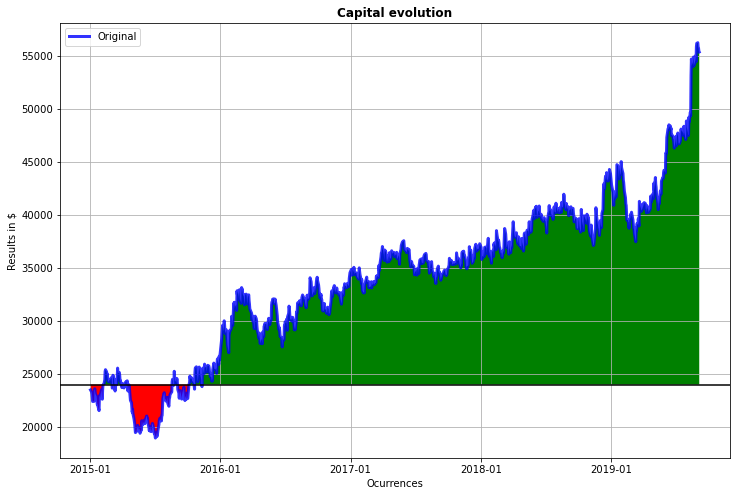

In [94]:
import matplotlib.dates as mdates
my_plot_1=pd.DataFrame((df_mc['original'].cumsum()+24000).tolist(),columns=['original'], index=df[df['result-amt']!=0]['date'].tolist())

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(df_mc['original'].cumsum()+24000, lw=1, alpha=.8)
ax.plot(my_plot_1['original'], lw=3, color="b", alpha=.8, label="Original")
ax.fill_between(df[df['result-amt']!=0]['date'].tolist(), my_plot_1['original'], 24000, facecolor='green', where=my_plot_1['original']>=24000)
ax.fill_between(df[df['result-amt']!=0]['date'].tolist(), my_plot_1['original'], 24000, facecolor='red', where=my_plot_1['original']<24000)
ax.axhline(24000, color="black")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)
ax.set_title('Capital evolution', fontweight="bold")
plt.ylabel("Results in $")
plt.xlabel('Ocurrences')
plt.show()
plt.close()

In [74]:
l=len(df_mc.columns)
df_mc[0].cumsum()[df_mc.shape[0]-1]


57512.5

In [79]:
# Localize the capital curve in df_mc of min and max.

df_mc

my_max=0.0
my_min=0.0
lst=df_mc.shape[0]-1
val_max=0.0
val_min=999999.9
my_idx_min=0
my_idx_max=0
for h in range(len(df_mc.columns)-1):
    val=df_mc[h].cumsum()[lst]
    if val > val_max:
        val_max = val
        my_idx_max = h
    if val < val_min:
        val_min = val
        my_idx_min = h

print('max ', val_max, my_idx_max)
print('min ', val_min, my_idx_min)

max  95687.5 212
min  -25825.0 391


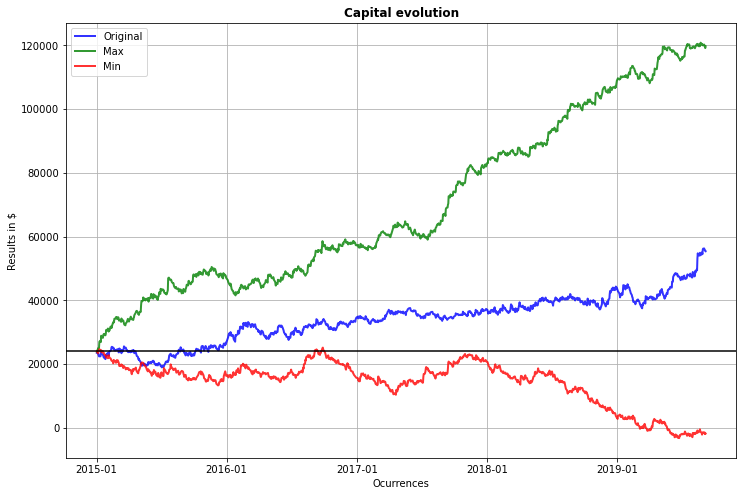

In [87]:
import matplotlib.dates as mdates
my_plot_8=pd.DataFrame((df_mc['original'].cumsum()+24000).tolist(),columns=['original'], index=df[df['result-amt']!=0]['date'].tolist())
my_plot_8[212]=(df_mc[212].cumsum()+24000).tolist()
my_plot_8[391]=(df_mc[391].cumsum()+24000).tolist()

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(df_mc['original'].cumsum()+24000, lw=1, alpha=.8)
ax.plot(my_plot_8['original'], lw=2, color="b", alpha=.8, label="Original")
ax.plot(my_plot_8[212], lw=2, color="g", alpha=.8, label="Max")
ax.plot(my_plot_8[391], lw=2, color="r", alpha=.8, label="Min")
ax.axhline(24000, color="black")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)
ax.set_title('Capital evolution', fontweight="bold")
plt.ylabel("Results in $")
plt.xlabel('Ocurrences')
plt.show()
plt.close()

In [45]:
# Function Max Drawdown evolution

guarantee=24000

def max_dd_evol(guarantee, my_serie):
    original=my_serie.tolist()
    l=len(original)
    
    cm_list=[]
    dd_list=[]
    dd_mx_list=[]
    dd_pc_list=[]
    dd_pc_mx_list=[]
    my_cum=guarantee
    my_cum_max=0.0
    my_dd=0.0
    my_dd_max=0.0
    my_dd_pc=0.0
    my_dd_pc_max=0.0
    for e in range(l):
        my_cum = my_cum + original[e]                         # cumulator
        if my_cum > my_cum_max:                                        # if increase cumulator dd=0
            my_cum_max = my_cum                                           # new max cumulator
            my_dd = 0
        else:
            my_dd = my_cum_max - my_cum                                # dd = max cumulator - current cumulator
        if my_dd > my_dd_max:                                          # if max dd
            my_dd_max = my_dd
        if my_cum_max > 0:
            my_dd_pc = my_dd/my_cum_max                                     # dd percentage
        else:
            my_dd_pc = 0.0
        if my_dd_pc > my_dd_pc_max:                                          # if max dd_pc
            my_dd_pc_max = my_dd_pc
        cm_list.append(my_cum)                                        # list for cumulator
        dd_list.append(my_dd)                                         # list for dd
        dd_mx_list.append(my_dd_max)                                  # list for dd_max
        dd_pc_list.append(my_dd_pc)                                   # list for dd_pc
        dd_pc_mx_list.append(my_dd_pc_max)                            # list for dd_pc_max
    
    my_dd=pd.DataFrame(0.0,columns=['original','cum','dd','max_dd','pct_dd','pct_max_dd'],index=range(l))
    my_dd['original']=my_serie
    my_dd['cum']=cm_list
    my_dd['dd']=dd_list
    my_dd['max_dd']=dd_mx_list
    my_dd['pct_dd']=dd_pc_list
    my_dd['pct_max_dd']=dd_pc_mx_list
    
    return my_dd


def max_dd(guarantee, my_serie):
    original=my_serie.tolist()
    l=len(original)
    
    cm_list=[]
    dd_list=[]
    dd_mx_list=[]
    dd_pc_list=[]
    dd_pc_mx_list=[]
    my_cum=guarantee
    my_cum_max=0.0
    my_dd=0.0
    my_dd_max=0.0
    my_dd_pc=0.0
    my_dd_pc_max=0.0
    for e in range(l):
        my_cum = my_cum + original[e]                         # cumulator
        if my_cum > my_cum_max:                                        # if increase cumulator dd=0
            my_cum_max = my_cum                                           # new max cumulator
            my_dd = 0
        else:
            my_dd = my_cum_max - my_cum                                # dd = max cumulator - current cumulator
        if my_dd > my_dd_max:                                          # if max dd
            my_dd_max = my_dd
        if my_cum_max > 0:
            my_dd_pc = my_dd/my_cum_max                                     # dd percentage
        else:
            my_dd_pc = 0.0
        if my_dd_pc > my_dd_pc_max:                                          # if max dd_pc
            my_dd_pc_max = my_dd_pc
        cm_list.append(my_cum)                                        # list for cumulator
        dd_list.append(my_dd)                                         # list for dd
        dd_mx_list.append(my_dd_max)                                  # list for dd_max
        dd_pc_list.append(my_dd_pc)                                   # list for dd_pc
        dd_pc_mx_list.append(my_dd_pc_max)                            # list for dd_pc_max

    my_max_dd =max(dd_list)
    my_max_pct_dd = max(dd_pc_list)
    
    return my_max_dd, my_max_pct_dd 

#my_dd.to_csv('../Data/test_dd.csv')

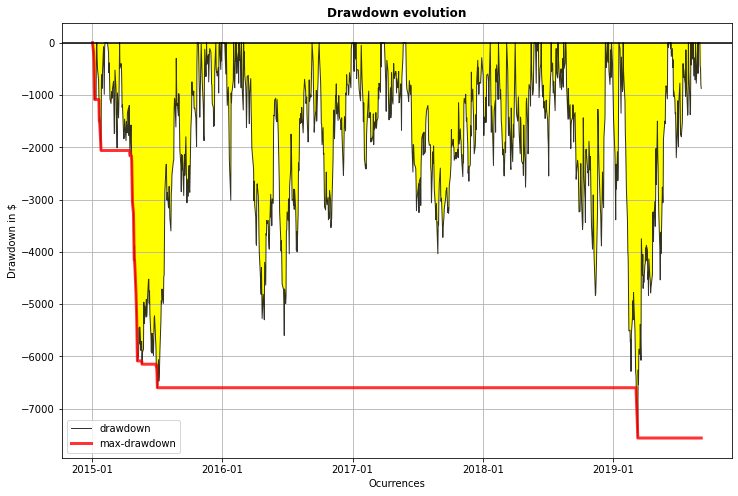

In [95]:
# DRAWDOWN PLOT IN AMOUNT

import matplotlib.dates as mdates

my_dd= max_dd_evol(24000, df_mc['original'])

my_plot_2=pd.DataFrame((my_dd['dd']*(0-1)).tolist(),columns=['drawdown'], index=df[df['result-amt']!=0]['date'].tolist())
my_plot_2['max_drawdown']=(my_dd['max_dd']*(0-1)).tolist()

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(df_mc['original'].cumsum()+24000, lw=1, alpha=.8)
ax.plot(my_plot_2['drawdown'], lw=1, color="black", alpha=.8, label="drawdown")
ax.plot(my_plot_2['max_drawdown'], lw=3, color="red", alpha=.8, label="max-drawdown")
ax.fill_between(df[df['result-amt']!=0]['date'].tolist(), my_plot_2['drawdown'], 0, facecolor='yellow')
ax.axhline(0, color="black")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)
ax.set_title('Drawdown evolution', fontweight="bold")
plt.ylabel("Drawdown in $")
plt.xlabel('Ocurrences')
plt.show()
plt.close()

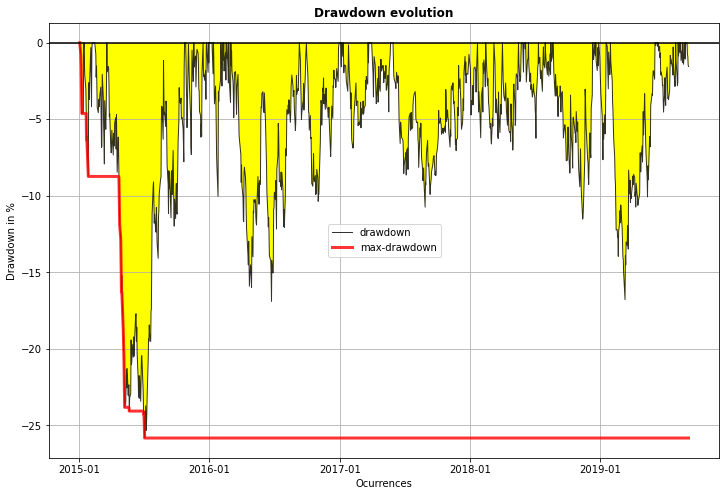

In [100]:
# DRAWDOWN PLOT IN PERCENTAGE

import matplotlib.dates as mdates

my_dd= max_dd_evol(24000, df_mc['original'])

my_plot_3=pd.DataFrame((my_dd['pct_dd']*(0-100)).tolist(),columns=['drawdown'], index=df[df['result-amt']!=0]['date'].tolist())
my_plot_3['max_drawdown']=(my_dd['pct_max_dd']*(0-100)).tolist()

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(df_mc['original'].cumsum()+24000, lw=1, alpha=.8)
ax.plot(my_plot_3['drawdown'], lw=1, color="black", alpha=.8, label="drawdown")
ax.plot(my_plot_3['max_drawdown'], lw=3, color="red", alpha=.8, label="max-drawdown")
ax.fill_between(df[df['result-amt']!=0]['date'].tolist(), my_plot_3['drawdown'], 0, facecolor='yellow')
ax.axhline(0, color="black")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)
ax.set_title('Drawdown evolution', fontweight="bold")
plt.ylabel("Drawdown in %")
plt.xlabel('Ocurrences')

plt.show()
plt.close()

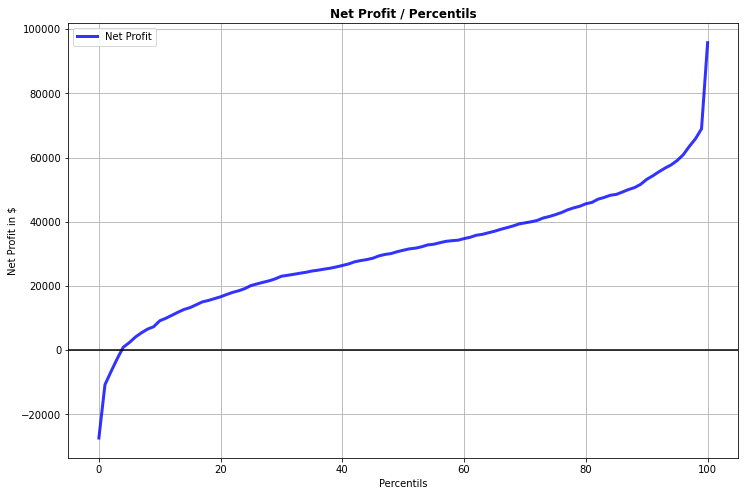

In [48]:
# Net Profit Percentils

import matplotlib.dates as mdates
my_plot_4=pd.DataFrame((df_quart['netprofit']).tolist(),columns=['netprofit'])

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(df_mc['original'].cumsum()+24000, lw=1, alpha=.8)
ax.plot(my_plot_4['netprofit'], lw=3, color="b", alpha=.8, label="Net Profit")
ax.axhline(0, color="black")
ax.legend()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)
ax.set_title('Net Profit / Percentils', fontweight="bold")
plt.ylabel("Net Profit in $")
plt.xlabel('Percentils')
plt.show()
plt.close()

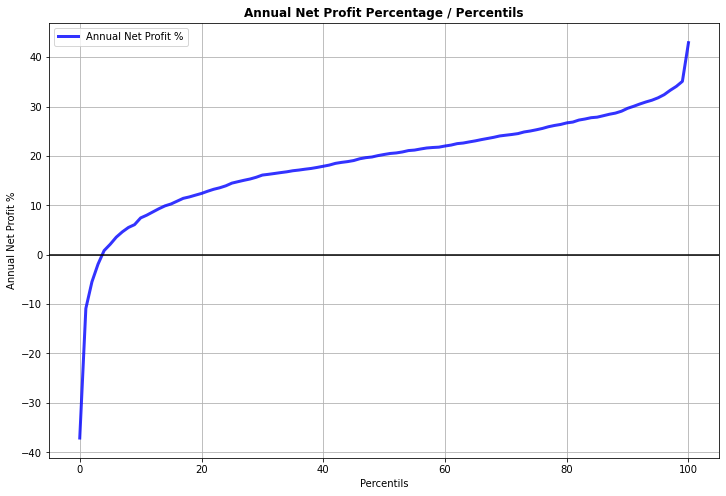

In [49]:
# Annual Net Profit percentage vs Percentils

import matplotlib.dates as mdates
my_plot_5=pd.DataFrame((df_quart['annual_netprofit_prc']*100).tolist(),columns=['netprofit'])

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(df_mc['original'].cumsum()+24000, lw=1, alpha=.8)
ax.plot(my_plot_5['netprofit'], lw=3, color="b", alpha=.8, label="Annual Net Profit %")
ax.axhline(0, color="black")
ax.legend()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)
ax.set_title('Annual Net Profit Percentage / Percentils', fontweight="bold")
plt.ylabel("Annual Net Profit %")
plt.xlabel('Percentils')
plt.show()
plt.close()

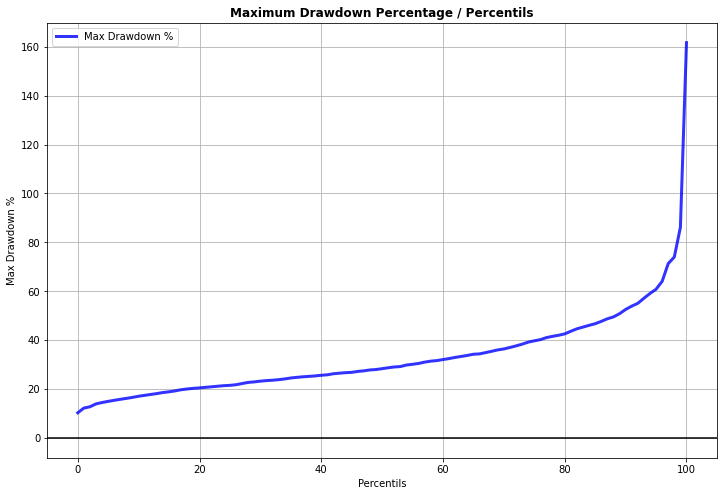

In [50]:
# Max Drawdown percentage vs Percentils

import matplotlib.dates as mdates
my_plot_6=pd.DataFrame((df_quart['MDD_prc']*100).tolist(),columns=['MDD'])

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(df_mc['original'].cumsum()+24000, lw=1, alpha=.8)
ax.plot(my_plot_6['MDD'], lw=3, color="b", alpha=.8, label="Max Drawdown %")
ax.axhline(0, color="black")
ax.legend()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)
ax.set_title('Maximum Drawdown Percentage / Percentils', fontweight="bold")
plt.ylabel("Max Drawdown %")
plt.xlabel('Percentils')
plt.show()
plt.close()

In [107]:
# net profit yearly
time=3.5 #(years)
a = ((c_frec['value_600'].sum()+24000)/24000)**(1/time) - 1
a


0.13000707593008465

In [63]:
# exposure 
ex=38/88
ex

0.4318181818181818

In [68]:
# Average profit in winners and average lost in losers

avg_profit=np.nanmean(np.where(df_rand['value_999']>=0,df_rand['value_999'],np.nan))
avg_lost=np.nanmean(np.where(df_rand['value_999']<0,df_rand['value_999'],np.nan))
prc_avg_profit = avg_profit/24000
prc_avg_lost = avg_lost/24000

print (avg_profit, prc_avg_profit)
print (avg_lost, prc_avg_lost)

445.3473413379074 0.018556139222412806
-340.4194078947368 -0.014184141995614035


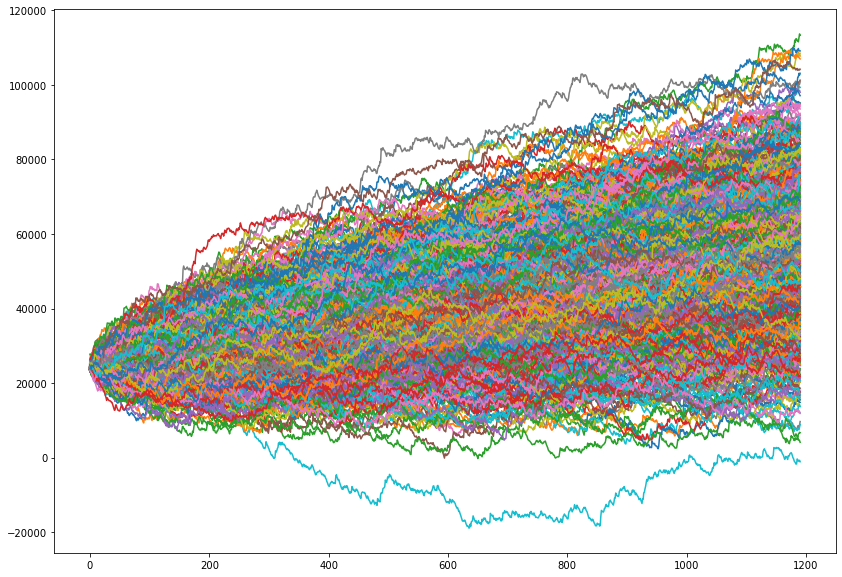

In [42]:
# plot
my_line=df_rand.cumsum()+24000
my_line.plot(kind='line', legend=False, figsize=(14,10));

In [96]:
# Ratio sharpe

# Simulate cumulative returns of 100 days
#N = 100
#R = pd.DataFrame(np.random.normal(size=100)).cumsum()
R = df_rand['value_600'].cumsum()
# Approach 1
#r = (R - R.shift(1))/R.shift(1)

# Approach 2
r = R.diff()

sr = r.mean()/r.std() * np.sqrt(252)
sr


0.3447453712054325

In [ ]:
# Ratio sharpe
=df_stat['value_999'].cumsum().diff().mean()/df_stat[jaj].cumsum().diff().std() * np.sqrt(252)


In [98]:
# recovery factor

df_rand['value_999'].sum()/np.ptp(df_rand['value_999'].cumsum())


0.8795407098121085

In [100]:
# profit factor
profit=np.nansum(np.where(df_rand['value_999']>=0,df_rand['value_999'],np.nan))
lost=np.nansum(np.where(df_rand['value_999']<0,df_rand['value_999'],np.nan))

print(profit, lost, -profit/lost)

259637.5 -206975.0 1.2544389419011959


In [ ]:
# stats to plot

# ratios ####
# net profit (precentage, acumm, final, annual percentage)
# capital (initial, final, minimum, maximum)
# maximum drawdown (amount, percentage)
# sharpe (0.5 - 2)
# recovery-factor ( 2 - 6)
# profit-factor ( 2 - 6)

# plots ####
# capital evolution
# table of monthly profit/lost  ????
# drawdown evolution
# Montecarlo Simulation
#      min/max capital evolution
#      final capital / percentils
#      annual profit percentage / percentils
#      max drawdown percentage / percentils


In [5]:
numbers=[12.7563832, 111111758764.4445, 894.0000433, 0.564433]
for x in numbers:
    print(f'{x:9.3f}')

   12.756
111111758764.445
  894.000
    0.564


In [24]:
from datetime import datetime
today_is=datetime.now().strftime('%Y-%m-%d %H:%M:%S')
df_strg_sumry=pd.DataFrame(columns=['id','datetime','contract','timetable','Rng Estim','Rng Adj',
                                    'Axis Target','period', 'Annual Profit%', 'Max Drawdown%',
                                    'Winners%', 'Recovery Factor', 'Profit Factor', 'Sharpe'])
df_strg_sumry.loc[0]=['jaja',today_is,'ES','09:00-18:30','4','70','2','2014-2019','10%','-25%','47.1%','1.5','1.10','0.83']
#[[today_is],['ES'],['09:00-18:30'],['4'],['70'],['2'],
#                           ['2014-2019'],['10%'],['-25%'],['47.1%'],['1.5'],['1.10'],['0.83']]
df_strg_sumry


,id,datetime,contract,timetable,Rng Estim,Rng Adj,Axis Target,period,Annual Profit%,Max Drawdown%,Winners%,Recovery Factor,Profit Factor,Sharpe
0,jaja,2020-10-23 19:29:50,ES,09:00-18:30,4,70,2,2014-2019,10%,-25%,47.1%,1.5,1.10,0.83


In [23]:
df_strg_sumry.shape[0]

1

In [25]:
df_strg_sumry.to_csv('../Data/TableStrategiesReg.csv',index=False)


In [29]:
df_strg_sumry[df_strg_sumry['id']=='jaja']['id'].count()

1

In [57]:
# Calculate Sortino Ratio

my_trades = df[df['result-amt']!=0]['result-amt'].mean()
my_trades

2.5587828492392806

In [80]:
df[df['result-amt']!=0]['result-amt'].mean()/np.sqrt(np.mean(df[df['result-amt']<0]['result-amt'].to_numpy()**2))* np.sqrt(252)

0.10173438743346731

In [81]:
df[df['result-amt']!=0]['result-amt'].mean()/df[df['result-amt']!=0]['result-amt'].std()* np.sqrt(252)

0.08191935110581215